# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [65]:
# Your code here. 
Age=[17,51,27,21,36,48,19,26,54,30]
Tardies=[10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({"Age": Age, "Tardies":Tardies})

In [66]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

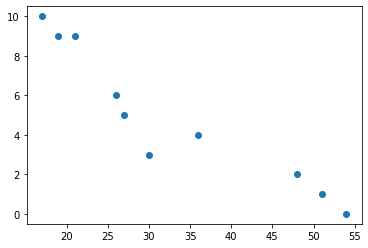

In [67]:
# Your code here.
plt.scatter(student_data.Age,student_data.Tardies);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [68]:
# Your response here. 
"""
We see that there is a negative relation: The younger my students are, the more often they are late to class.
"""

'\nWe see that there is a negative relation: The younger my students are, the more often they are late to class.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [69]:
# Your response here.

#Covariance: measure of relationship between the variability of 2 variables. How much will a variable change when another variable changes. 
cov=student_data.cov()
print(cov, "\n")

#Correlation: relationship between the variability of 2 variables. This standardization converts the values to the same scale.
#The closer is to -1 or 1, the stronger the relationship.
corr=student_data.corr()
print(corr)


                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444 

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [72]:
# Your response here.
# We will use a linear regression as we see that might be a good fit after seeing the scatter plot

# 1.defino x & y
X=student_data[["Age"]]
y=student_data["Tardies"]


# 2.defino model
lr=LinearRegression()

# 3.split test & train
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)


# 4.entreno modelo
lr.fit(X_train, y_train)
   
    
# 5.1. resultado de entrenamiento
print(lr.score(X_train, y_train))

# 5.2. 
print(lr.score(X_test, y_test))


0.7751426061422932
0.9541902270661325


In [75]:
X_train.shape

(7, 1)

In [78]:
X_test.shape

(3, 1)

In [ ]:
#vemos que hay pocos datos para analizar
#raro que el test sea más alto que los datos entrenados

Plot your regression model on your scatter plot.

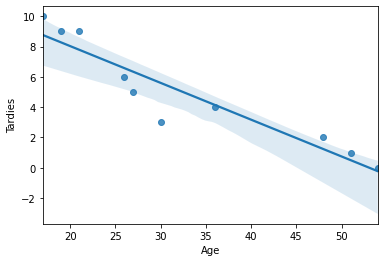

In [80]:
# Your code here.
sns.regplot(data=student_data, x="Age", y="Tardies");

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here.
#vemos que hay pocos datos para analizar
#raro que el test sea más alto que los datos entrenados
#de todas formas, vemos que sí hay una correlación entre age y tardies

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [171]:
# Import any libraries you may need & the data

df = pd.read_csv("/Users/annavilardell/Desktop/BootcampData/notebooks/data/vehicles.csv")
#index_col=0


In [172]:
df.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [173]:
# Your response here. 
#VERSIÓN 1
df.corr()["CO2 Emission Grams/Mile"].loc[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]


Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [174]:
#VERSIÓN 2
df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]].corr()["CO2 Emission Grams/Mile"]


Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [175]:
#VERSIÓN AVANZADA JAVI para tener el df de las variables más corrlacionadas
df[abs(df.corr()["CO2 Emission Grams/Mile"]).sort_values()[-4:-1].index]

,Highway MPG,Fuel Cost/Year,Fuel Barrels/Year
0,17,1950,19.388824
1,13,2550,25.354615
2,17,2100,20.600625
3,13,2550,25.354615
4,21,2550,20.600625
...,...,...,...
35947,38,1100,9.155833
35948,38,1100,9.155833
35949,38,1100,9.155833
35950,39,1100,9.155833


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [183]:
# Your response here. 

# 1.defino x & y
X=df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year"]]
y=df["CO2 Emission Grams/Mile"]


# 2.defino model
lr=LinearRegression()

# 3.split test & train
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)


# 4.entreno modelo
lr.fit(X_train, y_train)
   
    
# 5.1. resultado de entrenamiento
print(lr.score(X_train, y_train))

# 5.2. 
print(lr.score(X_test, y_test))


0.9868060603893268
0.9641320694693806


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [184]:
# Your response here. 

#vemos que variable infuye más a CO2 Emission Grams/Mile
lr.coef_

array([-0.22173323,  1.4310629 , 21.38447451, -2.1784189 ,  0.0217566 ])

In [189]:
#aquí vemos que % influye cada variable X a la y
abs(lr.coef_)/(abs(lr.coef_).sum())

array([0.00878588, 0.05670395, 0.84733116, 0.08631693, 0.00086208])

## Bonus Challenge: Error Analysis"


I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [202]:
# Your code here. 
invited=[1,3,4,6,8,9,11,14]
attended=[1,2,4,4,5,7,8,13]
people = pd.DataFrame({"invited": invited, "attended":attended})

In [203]:
people

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

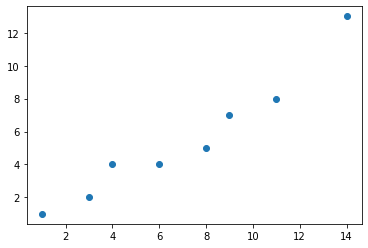

In [205]:
# Your code here.
plt.scatter(people.invited,people.attended);

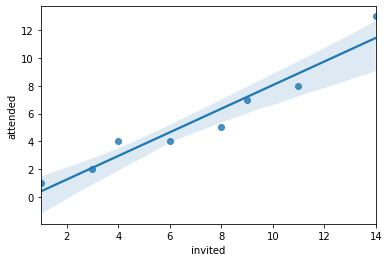

In [206]:
sns.regplot(data=people, x="invited", y="attended");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
"""
We see that there might be a positive correlation between the 2 variables
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [222]:
# Your response here. 

#calculo quantiles
q1=people["attended"].quantile(0.25)
q3=people["attended"].quantile(0.75)

#calculo rango interquantile
iqr=q3-q1

#calculo outliers
iqr*1.5

#outliers inferiores
limite_inferior=q1-(iqr*1.5)
limite_inferior

#outliers superiores
limite_superior=q3+(iqr*1.5)
limite_superior

#quitamos outliers 
df_no_outliers=people[(people["attended"]>limite_inferior) & (people["attended"]<limite_superior) ]

In [223]:
df_no_outliers

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


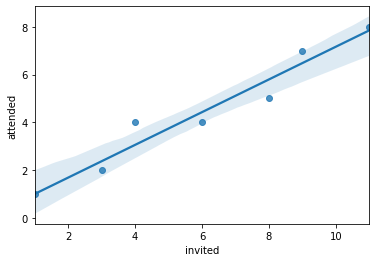

In [236]:
sns.regplot(data=df_no_outliers, x="invited", y="attended");

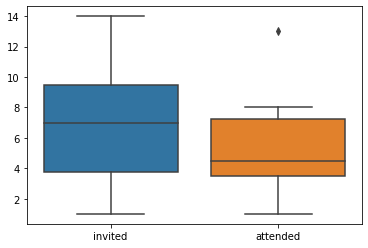

In [234]:
sns.boxplot(data=people);

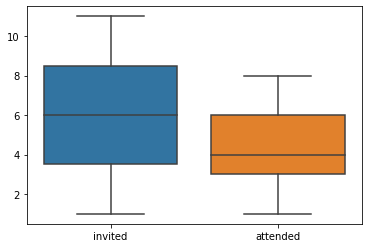

In [235]:
sns.boxplot(data=df_no_outliers);

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#volvermos a tener pocos datos para decidir si es o no un outlier importante o no
#vemos que la reg lineal no cambia mucho